# Capstone Project
Ashleigh SICO\
ITCS 5356-001\
7 December 2025

## Install packages

In [676]:
pip install xgboost lightgbm scikit-learn

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 6.5 MB/s eta 0:00:11
   - -------------------------------------- 3.4/72.0 MB 9.3 MB/s eta 0:00:08
   --- ------------------------------------ 6.3/72.0 MB 10.9 MB/s eta 0:00:07
   ----- ---------------------------------- 9.4/72.0 MB 11.8 MB/s eta 0:00:06
   ------ --------------------------------- 11.0/72.0 MB 11.1 MB/s eta 0:00:06
   ------- -------------------------------- 13.9/72.0 MB 11.5 MB/s eta 0:00:06
   --------- ------------------------------ 16.8/72.0 MB 11.8 MB/s eta 0:00:05
   ---------- ----------------------------- 19.7/72.0 MB 12.1 MB/s eta 0:00:05
   ------------ --------------------------- 22.3/72.0 MB 12.2 MB/s eta 0:00:05
   -------------- ------------------------- 25.4/72.0 MB 12.4 MB/s eta 0:00:04
   --------------- ------------------------ 28.3/72.0 MB 12.5 MB/s eta 0:00:04
   ----------------- ---------------------- 31.5/72.0 MB 12.7 MB/s 

In [867]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from abc import ABC, abstractmethod
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from scipy.spatial.distance import cdist

## Understand the Dataset

In [805]:
# load training data
housing_trn_df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")

# split into training and validation
housing_trn_df, housing_vld_df = train_test_split(housing_trn_df)

# get target values
housing_trn_target_ns = housing_trn_df['SalePrice'].to_numpy().reshape(-1,1)
housing_vld_target_ns = housing_vld_df['SalePrice'].to_numpy().reshape(-1,1)
housing_trn_df = housing_trn_df.drop(['SalePrice', 'Id'], axis=1)
housing_vld_df = housing_vld_df.drop(['SalePrice', 'Id'], axis=1)

# loading testing data
housing_tst_df = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")
housing_tst_df = housing_tst_df.drop('Id', axis=1)

print(housing_trn_df.shape)
print(housing_vld_df.shape)
print(housing_tst_df.shape)

(1095, 79)
(365, 79)
(1459, 79)


The training dataset has 1460 samples and the test dataset has 1459 samples.

The dataset has 79 features.
1. MSSubClass:  type of dwelling
2. MSZoning:  general zoning classification
3. LotFrontage:  linear feet of street connected to property
4. LotArea:  lot size in square feet
5. Street:  type of road access
6. Alley:  type of alley access
7. LotShape:  general shape of property
8. LandCountour:  flatness of property
9. Utilities
10. LotConfig
11. LandSlope
12. Neigborhood
13. Condition1:  Proximity to various conditions
14. Condition2:  Proximiity to various condiditons if more than 1 is present
15. BldgType
16. HouseStyle
17. OverallQual:  rates overall material and finish of house (1-10)
18. OverallCond:  rates overall condition of house (1-10)
19. YearBuilt
20. YearRemodAdd
21. RoofStyle
22. RoofMatl
23. Exterior1st
24. Exterior2nd
25. MasVnrType
26. MasVnrArea
27. ExterQual
28. ExterCond
29. Foundatation
30. BsmtQual
31. BsmtCond
32. BsmtExposure
33. BsmtFinType1
34. BsmtFinSF1:  Type 1 finished square feet
35. BsmtFinType2
36. BsmtFinSF2
37. BsmtUnfSF
38. TotalBsmtSF
39. Heating
40. HeatingQC
41. CentralAir:  Y/N
42. Electrical
43. 1stFlrSF
44. 2ndFlrSF
45. LowQualFinSF
46. GrLivArea:  Aobve ground living area square feet
47. BsmtFullBath
48. BsmtHalfBath
49. FullBath
50. HalfBath
51. Bedroom
52. Kitchen
53. KitchenQual
54. TotRmsAbvGrd
55. Functional
56. Fireplaces
57. FireplaceQu
58. GarageType
59. GarageYrBlt
60. GarageFinish
61. GarageCars
62. GarageArea
63. GarageQual
64. GarageCond
65. PavedDrive
66. WoodDeckSF
67. OpenPorchSF
68. EncolsedPorch
69. 3SsnPorch
70. ScreenPorch
71. PoolArea
72. PoolQC
73. Fence
74. MiscFeature
75. MiscVal
76. MoSold
77. YrSold
78. SaleType
79. SaleCondition

The training dataset has 1460 samples and the test dataset has 1459 samples.

The dataset has 79 features.

In [806]:
column_names = housing_trn_df.columns
column_names

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [807]:
categorical_cols = ['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood',
                    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                    'Foundation', 'Heating', 'Electrical', 'Functional', 'SaleType', 'SaleCondition']
print(len(categorical_cols))
ordinal_cols = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
               'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC']
print(len(ordinal_cols))
fill_NA_cols = ['Alley', 'GarageType', 'Fence']
fill_none_cols = ['MasVnrType', 'MiscFeature']
fill_0_cols = ['LotFrontage', 'GarageYrBlt']
numerical_cols = [col for col in column_names if col not in categorical_cols and col not in ordinal_cols and col not in fill_NA_cols and col not in fill_0_cols and col not in fill_none_cols]
print(len(numerical_cols))
categories = [
    [20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190],
    ['A', 'C (all)', 'FV', 'I', 'RH', 'RP', 'RM', 'RL'],
    ['Grvl', 'Pave'],
    ['Lvl', 'Bnk', 'HLS', 'Low'],
    ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'],
    ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
    ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
    ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'],
    ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'],
    ['1Fam', '2fmCon', 'Duplex','Twnhs', 'TwnhsE', 'TwnhsI'],
    ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'],
    ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'],
    ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'],
    ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
    ['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng'],
    ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'],
    ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'],
    ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'],
    ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'],
    ['WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD', 'Oth'],
    ['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial']
]
other_cats = [
    ['Grvl', 'Pave', 'NA'],
    ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA'],
    ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'],
]

other_cats_none = [
        ['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'],
        ['Elev', 'Gar2', 'Othr', 'Shed', 'TenC', 'None']
]
    
ratings = [
    ['IR3', 'IR2', 'IR1', 'Reg'],
    ['Gtl', 'Mod', 'Sev'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['NA', 'No', 'Mn', 'Av', 'Gd'],
    ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['N', 'Y'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['NA', 'Unf', 'RFn', 'Fin'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['N', 'P', 'Y'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
]

categorical_pipe = Pipeline([
    ('fill vals', SimpleImputer(strategy='most_frequent')),
    ('one hot', OneHotEncoder(categories=categories, sparse_output=False))])

NA_pipe = Pipeline([
    ('fill vals', SimpleImputer(strategy='constant', fill_value='NA')),
    ('one hot', OneHotEncoder(categories=other_cats, sparse_output=False))])

none_pipe = Pipeline([
    ('fill vals', SimpleImputer(strategy='constant', fill_value='None')),
    ('one hot', OneHotEncoder(categories=other_cats_none, sparse_output=False))])

num_pipe = Pipeline([
    ('fill vals', SimpleImputer(strategy='mean')),
    ('standardize', StandardScaler())])

zero_pipe = Pipeline([
    ('fill vals', SimpleImputer(strategy='constant', fill_value=0)),
    ('standardize', StandardScaler())])

ordinal_pipe = Pipeline([
    ('fill vals', SimpleImputer(strategy='constant', fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories=ratings)),
    ('standardize', StandardScaler())])

feature_processor = ColumnTransformer([
    ('categorical data', categorical_pipe, categorical_cols),
    ('NA', NA_pipe, fill_NA_cols),
    ('numerical data', num_pipe, numerical_cols),
    ('0', zero_pipe, fill_0_cols),
    ('ordinal data', ordinal_pipe, ordinal_cols)
])

housing_trn_clean = feature_processor.fit_transform(housing_trn_df)
housing_vld_clean = feature_processor.transform(housing_vld_df)
housing_tst_clean = feature_processor.transform(housing_tst_df)

print(housing_trn_clean.shape)

21
18
33
(1095, 253)


In [808]:
target_pipe = Pipeline([('standardize', StandardScaler())])

housing_trn_target = target_pipe.fit_transform(housing_trn_target_ns).reshape(-1)
housing_vld_target = target_pipe.transform(housing_vld_target_ns).reshape(-1)

## Implement Classical ML Algorithms

In [809]:
class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""

    @abstractmethod
    def fit(self, X, y):
        pass

    @abstractmethod
    def predict(self, X):
        pass

In [810]:
def get_mini_batches(data_len: int, batch_size: int = 32):
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data
            
            batch_size: Size of each mini batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.
    
    """
    X_idx = np.arange(data_len)
    np.random.shuffle(X_idx)
    batches = [X_idx[i:i+batch_size] for i in range(0, data_len, batch_size)]
    
    return batches

In [826]:
def mse(y_hat, y):
    return np.mean(pow((y_hat-y), 2))
def rmse(y_hat,y):
    return np.sqrt(mse(y_hat,y))

### Linear Regression with Least Mean Squares

In [812]:
class LinearRegression(BaseModel):
    '''
    Performs regression using least mean squares (gradient descent)

    attributes:
        w (np.ndarray): weight matrix

        alpha (float): learning rate or step size

        epochs (int): Number of epochs to run for mini-batch gradient descent

        batch_size (int):  batch size for mini-batch gradient descent

        seed (int): Seed to be used for NumPy's RandomState class or universal seed np.random.seed() function.
    '''
    
    def __init__(self, alpha, epochs, batch_size, seed=42, verbose=False):
        self.w = None
        self.alpha = alpha
        self.epochs = epochs
        self.batch_size = batch_size
        self.seed = seed
        self.verbose = verbose

    # add a biases
    def add_ones(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def fit(self, X: np.ndarray, y: np.ndarray, X_vld: np.ndarray=None, y_vld: np.ndarray=None):
        # add bias
        X = self.add_ones(X)
        if X_vld is not None:
            X_vld = self.add_ones(X_vld)
        # assign a random value for w
        rng = np.random.RandomState(self.seed)
        self.w = rng.random(X.shape[1])
        mse_list = []
        mse_vld_list = []
        
        for e in range(self.epochs):
            sse = 0
            sse_vld = 0
            if self.verbose:
                print(f"\nEpoch:  {e}")
            batches = get_mini_batches(data_len=len(X), batch_size=self.batch_size)
            for mb in batches:
                #current weight prediction
                y_hat = X[mb] @ self.w

                #update gradient
                avg_gradient = ((y_hat-y[mb]) @ X[mb])/len(mb)

                #update w
                self.w -= self.alpha * avg_gradient

                # calculate error
                error = (y_hat - y[mb])
                sse += np.sum(error**2)

            # calculate validation error
            if X_vld is not None and y_vld is not None:
                y_hat_vld = X_vld @ self.w
                error = y_hat_vld - y_vld
                sse_vld += np.sum(error**2)
                mse_vld_list.append(sse_vld/ len(X_vld))
                    
            mse_list.append(sse / len(X))
            if self.verbose:
                print(f"MSE:  {mse_list[-1]}")
                if X_vld is not None and y_vld is not None:
                    print(f"Validation MSE:  {mse_vld_list[-1]}")
        return mse_list, mse_vld_list

    def predict(self, X: np.ndarray):
        X = self.add_ones(X)
        y_hat = X @ self.w

        return y_hat

Scaled Training RMSE:  0.44702821528344183
Scaled Validation RMSE:  0.5348904165205395
Training RMSE:  37123.494368098625
Validation RMSE:  44420.017990720524


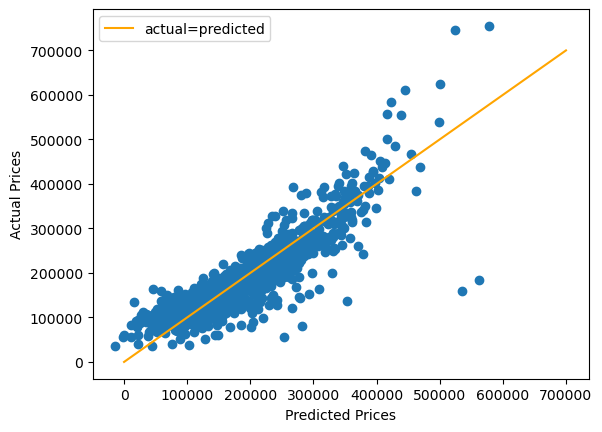

In [843]:
lr = LinearRegression(
    alpha=0.01,
    epochs=100,
    batch_size=32,
    seed=42, 
    verbose=False
)

# fit model
mse_list, mse_vld_list = lr.fit(housing_trn_clean, housing_trn_target, housing_vld_clean, housing_vld_target)

# make predictions
y_hat_trn = lr.predict(housing_trn_clean)
y_hat_vld = lr.predict(housing_vld_clean)

# calculate error
trn_rmse = rmse(y_hat_trn, housing_trn_target)
vld_rmse = rmse(y_hat_vld, housing_vld_target)

print(f"Scaled Training RMSE:  {trn_rmse}")
print(f"Scaled Validation RMSE:  {vld_rmse}")

scaler = StandardScaler()
scaler.fit(housing_trn_target_ns)

original_y_hat_trn = scaler.inverse_transform(y_hat_trn.reshape(-1,1))
original_y_hat_vld = scaler.inverse_transform(y_hat_vld.reshape(-1,1))
trn_rmse_ns = rmse(original_y_hat_trn, housing_trn_target_ns.reshape(-1,1))
vld_rmse_ns = rmse(original_y_hat_vld, housing_vld_target_ns.reshape(-1,1))

print(f"Training RMSE:  {trn_rmse_ns}")
print(f"Validation RMSE:  {vld_rmse_ns}")

# plot
plt.scatter(list(original_y_hat_trn.reshape(-1)) + list(original_y_hat_vld.reshape(-1)), list(housing_trn_target_ns) + list(housing_vld_target_ns))
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.plot([0,700000], [0,700000], color='orange', label='actual=predicted')
plt.legend()
plt.show()


### L2 Ridge Regression

In [844]:
class L2Regression(BaseModel):
    """
        Performs polynomial regression with l2 regularization using the ordinary least squares algorithm
    
        attributes:
            w (np.ndarray): weight matrix that is inherited from OrdinaryLeastSquares
            
            degree (int): the number of polynomial degrees to include when adding
                polynomial features.
    """

    def __init__(self, degree: int, alpha: float, lamb: float, epochs: int, batch_size: int, seed:int=42, verbose=False):
        self.degree = degree
        self.alpha = alpha
        self.lamb = lamb
        self.epochs = epochs
        self.batch_size = batch_size
        self.seed = seed
        self.verbose = verbose

    # add a biases
    def add_ones(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    def add_polynomial_features(self, X: np.ndarray) -> np.ndarray:
        poly_feat = PolynomialFeatures(degree=self.degree, include_bias=False)
        return poly_feat.fit_transform(X)
        
    def fit(self, X: np.ndarray, y: np.ndarray, X_vld: np.ndarray=None, y_vld: np.ndarray=None):
        poly_X = self.add_polynomial_features(X)
        poly_X = self.add_ones(poly_X)

        if X_vld is not None:
            poly_X_vld = self.add_polynomial_features(X_vld)
            poly_X_vld = self.add_ones(poly_X_vld)
            
        # assign a random value for w
        rng = np.random.RandomState(self.seed)
        self.w = rng.random(poly_X.shape[1])
        mse_list = []
        mse_vld_list = []
        
        for e in range(self.epochs):
            sse = 0
            sse_vld = 0
            if self.verbose:
                print(f"\nEpoch:  {e}")
            batches = get_mini_batches(data_len=len(X), batch_size=self.batch_size)
            for mb in batches:
                #current weight prediction
                y_hat = poly_X[mb] @ self.w

                #update gradient
                avg_gradient = ((y_hat - y[mb]) @ poly_X[mb] + self.lamb * self.w)/len(mb)

                #update w
                self.w -= self.alpha * avg_gradient

                # calculate error
                error = (y_hat - y[mb])
                sse += np.sum(error**2)

            # calculate validation error
            if X_vld is not None and y_vld is not None:
                y_hat_vld = poly_X_vld @ self.w
                error = y_hat_vld - y_vld
                sse_vld += np.sum(error**2)
                mse_vld_list.append(sse_vld/ len(X))
                    
            mse_list.append(sse / len(X))
            if self.verbose:
                print(f"MSE:  {mse_list[-1]}")
                if X_vld is not None and y_vld is not None:
                    print(f"Validation MSE:  {mse_vld_list[-1]}")
        return mse_list, mse_vld_list

    def predict(self, X: np.ndarray) -> np.ndarray:
        poly_X = self.add_polynomial_features(X)
        poly_X = self.add_ones(poly_X)
        y_hat = poly_X @ self.w

        return y_hat

Training MSE:  0.1548999175139681
Validation MSE:  0.16328026950890864
Scaled Training RMSE:  0.44702821528344183
Scaled Validation RMSE:  0.5348904165205395
Training RMSE:  32684.323962872066
Validation RMSE:  33556.817620421556


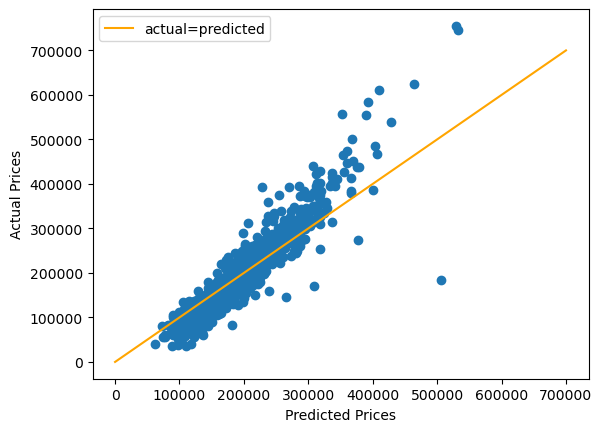

In [845]:
pr = L2Regression(
    degree=2,
    alpha=0.00005,
    lamb = 2500,
    epochs=200,
    batch_size=64,
    seed=42, 
    verbose=False
)

# fit model
mse_list, mse_vld_list = pr.fit(housing_trn_clean, housing_trn_target, housing_vld_clean, housing_vld_target)

# make predictions
y_hat_trn = pr.predict(housing_trn_clean)
y_hat_vld = pr.predict(housing_vld_clean)

# calculate error
trn_mse = mse(y_hat_trn, housing_trn_target)
vld_mse = mse(y_hat_vld, housing_vld_target) 

print(f"Training MSE:  {trn_mse}")
print(f"Validation MSE:  {vld_mse}")

print(f"Scaled Training RMSE:  {trn_rmse}")
print(f"Scaled Validation RMSE:  {vld_rmse}")

scaler = StandardScaler()
scaler.fit(housing_trn_target_ns)

original_y_hat_trn = scaler.inverse_transform(y_hat_trn.reshape(-1,1))
original_y_hat_vld = scaler.inverse_transform(y_hat_vld.reshape(-1,1))
trn_rmse_ns = rmse(original_y_hat_trn, housing_trn_target_ns.reshape(-1,1))
vld_rmse_ns = rmse(original_y_hat_vld, housing_vld_target_ns.reshape(-1,1))

print(f"Training RMSE:  {trn_rmse_ns}")
print(f"Validation RMSE:  {vld_rmse_ns}")

# plot
plt.scatter(list(original_y_hat_trn.reshape(-1)) + list(original_y_hat_vld.reshape(-1)), list(housing_trn_target_ns) + list(housing_vld_target_ns))
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.plot([0,700000], [0,700000], color='orange', label='actual=predicted')
plt.legend()
plt.show()

### Neural Network Regression

In [846]:
def delta_mse(y, y_hat):
    return y_hat - y

class Linear():
    @staticmethod
    def activation(z):
        return z
    
    @staticmethod
    def derivative(z):
        return np.ones(z.shape)
    
class Sigmoid():
    @staticmethod
    def activation(z):
        return 1 / (1 + np.exp(-z))
    
    @staticmethod
    def derivative(z):
        return Sigmoid.activation(z) * (1- Sigmoid.activation(z))

class Tanh():
    @staticmethod
    def activation(z):
        return np.tanh(z)
    
    @staticmethod
    def derivative(z):
        return 1 - np.tanh(z)**2

class ReLU():
    @staticmethod
    def activation(z):
        return np.maximum(0,z)
    
    @staticmethod
    def derivative(z):
        z = z.copy()
        z[z>=0] = 1
        z[z<0] = 0
        return z

In [847]:
class Layer():
    """ Class which stores all variables required for a layer in a neural network
    
        Attributes:
            W: NumPy array of weights for all neurons in the layer
            
            b: NumPy array of biases for all neurons in the layer
            
            g: Activation function for all neurons in the layer
            
            name: Name of the layer
            
            neurons: Number of neurons in the layer
            
            inputs: Number of inputs into the layer
            
            Z: Linear combination of weights and inputs for all neurons. 
                Initialized to an empty array until it is computed and set.
                
            A: Activation output for all neurons. Initialized to an empty 
                array until it is computed and set.
    """
    def __init__(
        self, 
        W:np.array, 
        b:np.array, 
        g: object, 
        name: str=""
    ):
        self.W = W
        self.b = b
        self.g = g
        self.name = name 
        self.neurons = len(W)
        self.inputs = W.shape[1]
        self.Z = np.array([])
        self.A = np.array([])
    
    def print_info(self) -> None:
        """ Prints info for all class attributes"""
        print(f"{self.name}")
        print(f"\tNeurons: {self.neurons}")
        print(f"\tInputs: {self.inputs}")
        print(f"\tWeight shape: {self.W.shape}")
        print(f"\tBias shape: {self.b.shape}")
        print(f"\tActivation function: {self.g.__name__}")
        print(f"\tZ shape: {self.Z.shape}")
        print(f"\tA shape: {self.A.shape}")
    

In [848]:
class NeuralNetwork(BaseEstimator):
    """ Runs the initialization and training process for a multi-layer neural network.
        
        Attributes:
            neurons_per_layer: A list where each element represents 
                    the neurons in a layer. For example, [2, 3] would
                    create a 2 layer neural network where the hidden layer
                    has 2 neurons and the output layer has 3 neurons.
            
            g_hidden: Activation function used by ALL neurons 
                in ALL hidden layers.
                    
            g_output: Activation function used by ALL neurons
                in the output layer.
        
            alpha: learning rate or step size used by gradient descent.
                
            epochs: Number of times data is used to update the weights `self.w`.
                Each epoch means a data sample was used to update the weights at least
                once.
            
            batch_size: Mini-batch size used to determine the size of mini-batches
                if mini-batch gradient descent is used.
            
            seed: Random seed to use when initializing the layers of the neural network.

            verbose: If True, print statements inside the train() method will
                be printed.

            nn: A list of Layer class instances which define the neural network.

            avg_trn_loss_tracker: A list that tracks the average training loss per epoch. 

            avg_vld_loss_tracker: A list that tracks the average validation loss per epoch.
            
    """
    def __init__(
        self,
        neurons_per_layer: list[int],
        g_hidden: object,
        g_output: object,
        alpha: float = .001, 
        epochs: int = 1, 
        batch_size: int = 64,
        seed: int = None,
        verbose: bool = False,
    ):
        self.neurons_per_layer = neurons_per_layer
        self.g_hidden = g_hidden
        self.g_output = g_output
        self.alpha = alpha
        self.epochs = epochs
        self.batch_size = batch_size
        self.seed = seed
        self.verbose = verbose

        self.nn = []
   

    def init_neural_network(self, n_input_features: int)-> list[Layer]:
        """ Initializes weights and biases for a multi-layer neural network 
        
            Args:
                n_input_features: Number of features the input data has
        """
        nn = []
        # Set numpy global random seed
        np.random.seed(self.seed)
        for l, neurons in enumerate(self.neurons_per_layer):
            # Set inputs to number of input features
            # for the first hidden layer
            if l == 0:
                inputs = n_input_features
            else:
                inputs = self.neurons_per_layer[l-1]
            
            # Set activation functions for the output
            # layer neurons and set the names of the nn
            if l == len(self.neurons_per_layer)-1:
                g = self.g_output
                name = f"Layer {l+1}: Output Layer"
            else:
                g = self.g_hidden
                name = f"Layer {l+1}: Hidden Layer"
            
            W = self.init_weights(neurons, inputs)
            b = np.ones([neurons,1])
            nn.append(Layer(W,b,g,name))
            
        return nn

    def init_weights(self, neurons: int, inputs: int) -> np.ndarray:
        """ Initializes weight values
        
            Args:
                neurons: Number of neurons in the layer
                
                inputs: Number of inputs to the layer
        """
        return np.random.uniform(
            low=-0.5, 
            high=0.5, 
            size=(neurons, inputs))
    
    def fit(
        self, 
        X: np.ndarray, 
        y: np.ndarray, 
        X_vld: np.ndarray = None, 
        y_vld: np.ndarray = None,
    ) -> None:
        """ Initializes and trains the defined neural network using gradient descent  
        
            Args:
                X: Training features/data 
                
                y: Training targets/labels

                X_vld: validation features/data which are used for computing the validation
                    loss after every epoch.

                y_vld: validation targets/labels which are used for computing the validation
        
        """        
        self.nn = self.init_neural_network(X.shape[1])
        mse_list = []
        mse_vld_list = []
        
        for e in range(self.epochs):
            sse = 0
            sse_vld = 0
            if self.verbose: print(f"Epoch: {e+1}")
            batches = get_mini_batches(data_len=len(X), batch_size=self.batch_size)
            for mb in batches:
                # Forward pass to get predictions
                y_hat = self.forward(X[mb])

                # Backward pass to get gradients
                self.backward(X[mb], y[mb], y_hat)

            # Calculate error
            y_hat = self.forward(X)
            mse_list.append(mse(y_hat, y))

            # Calculate validation error
            if X_vld is not None and y_vld is not None:
                y_hat_vld = self.forward(X_vld)
                mse_vld_list.append(mse(y_hat_vld, y_vld))
                
            if self.verbose: 
                print(f"MSE:  {mse_list[-1]}")
                if X_vld is not None and y_vld is not None:
                    print(f"Validation MSE:  {mse_vld_list[-1]}")
        return mse_list, mse_vld_list
            
        
            
    def forward(self, X:np.ndarray) -> np.ndarray:
        """ Performs the forward pass for a multi-layer neural network
    
            Args:
                X: Input features. This should be typically be the 
                    training data.
        """
        A = X.T
        for l, layer in enumerate(self.nn):
            layer.Z = layer.W @ A + layer.b
            layer.A = layer.g.activation(layer.Z)
            A = layer.A
        return A.T
    
    def backward(self, X:np.ndarray, y:np.ndarray, y_hat:np.ndarray) -> None:
        """ Performs the feedback process for a multi-layer neural network
        
            Args:
                X: Training features/data
                
                y: Training targets/labels
                
                y_hat: Training predictions (predicted targets or probabilities)
        """
        layer_index = np.arange(len(self.nn))[::-1]
        delta_A = delta_mse(y, y_hat).T
        for l, layer in zip(layer_index, self.nn[::-1]):
            if l == 0:
                A = X.T
            else:
                prev_layer = self.nn[l-1]
                A = prev_layer.A
            delta_Z = delta_A * layer.g.derivative(layer.Z)
            delta_W = delta_Z @ A.T
            W_avg_grad = delta_W / len(y)

            delta_b = delta_Z @ np.ones([len(y),1])
            b_avg_grad = delta_b / len(y)

            delta_A = layer.W.T @ delta_Z

            #updates biases and weights
            layer.b -= self.alpha * b_avg_grad
            layer.W -= self.alpha * W_avg_grad
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using parameters learned during training.
        
            Args:
                X: Features/data to make predictions with 

            TODO:
                Finish this method by adding code to make a prediction. 
                Store the predicted labels into `y_hat`.
        """
        y_hat = self.forward(X)
        return y_hat

Scaled Training RMSE:  0.44702821528344183
Scaled Validation RMSE:  0.5348904165205395
Training RMSE:  31481.295999510454
Validation RMSE:  37625.46847865061


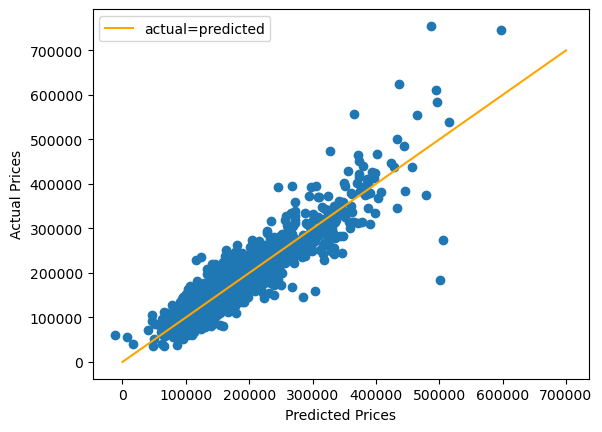

In [850]:
nn = NeuralNetwork(
    neurons_per_layer=[25,10,1],
    g_hidden=ReLU,
    g_output=Linear,
    alpha=0.002, 
    epochs=200, 
    batch_size=32,
    seed=42,
    verbose=False,
)

housing_trn_target_1 = housing_trn_target.reshape(-1,1)
housing_vld_target_1 = housing_vld_target.reshape(-1,1)

# fit model
mse_list, mse_vld_list = nn.fit(housing_trn_clean, housing_trn_target_1, housing_vld_clean, housing_vld_target_1)

# make predictions
y_hat_trn = nn.predict(housing_trn_clean)
y_hat_vld = nn.predict(housing_vld_clean)

# calculate error
trn_mse = mse(y_hat_trn, housing_trn_target_1)
vld_mse = mse(y_hat_vld, housing_vld_target_1) 

print(f"Scaled Training RMSE:  {trn_rmse}")
print(f"Scaled Validation RMSE:  {vld_rmse}")

scaler = StandardScaler()
scaler.fit(housing_trn_target_ns)

original_y_hat_trn = scaler.inverse_transform(y_hat_trn.reshape(-1,1))
original_y_hat_vld = scaler.inverse_transform(y_hat_vld.reshape(-1,1))
trn_rmse_ns = rmse(original_y_hat_trn, housing_trn_target_ns.reshape(-1,1))
vld_rmse_ns = rmse(original_y_hat_vld, housing_vld_target_ns.reshape(-1,1))

print(f"Training RMSE:  {trn_rmse_ns}")
print(f"Validation RMSE:  {vld_rmse_ns}")

# plot
plt.scatter(list(original_y_hat_trn.reshape(-1)) + list(original_y_hat_vld.reshape(-1)), list(housing_trn_target_ns) + list(housing_vld_target_ns))
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.plot([0,700000], [0,700000], color='orange', label='actual=predicted')
plt.legend()
plt.show()

## Literature-Based Implementation

### Hybrid Regreesion:  Random Forest, XGBoost, LGMBoost

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3127
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 147
[LightGBM] [Info] Start training from score 0.000000
Random Forest MSE:  0.03437836896606582
Random Forest Validation MSE:  0.12856603739855196
XGBoost MSE:  0.05904717815243352
XGBoost Validation MSE:  0.13020888575716338
LightGBM MSE:  0.0237133044093336
LightGBM Validation MSE:  0.1327953294917658
Hybrid MSE:  0.029886824862141222
Hybrid Validation MSE:  0.12014175869333206
Scaled Training RMSE:  0.44702821528344183
Scaled Validation RMSE:  0.5348904165205395
Training RMSE:  14356.672799882783
Validation RMSE:  28784.646863998572


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


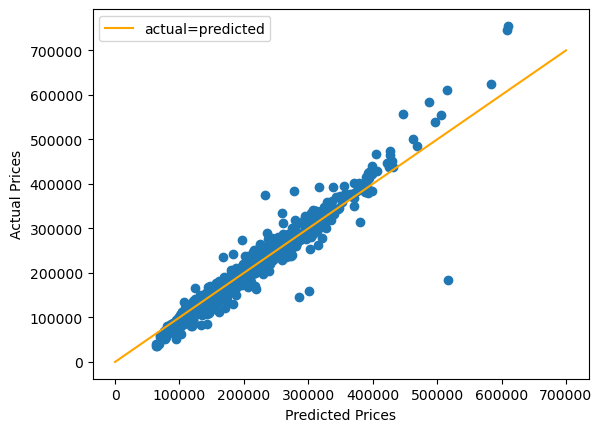

In [856]:
# define random forest
rf = RandomForestRegressor(
    n_estimators=900,
    bootstrap=True,
    max_depth=20,
    min_samples_split=10,
    random_state=42
)

# define XGBoost
xgb = XGBRegressor(
    learning_rate = 0.01,
    n_estimators=200,
    min_child_weight=2,
    subsample=1,
    colsample_bytree=0.8,
    reg_lambda=0.45,
    reg_alpha=0,
    gamma=0.5,
    seed=42
)

# define LightGBM
lgbm = LGBMRegressor(
    learning_rate=0.15,
    n_estimators=64,
    min_child_weight=2,
    num_leaves=36,
    colsample_bytree=0.8,
    reg_lambda=0.4,
    random_state=42
)

# train models
rf.fit(housing_trn_clean, housing_trn_target)
xgb.fit(housing_trn_clean, housing_trn_target)
lgbm.fit(housing_trn_clean, housing_trn_target)

# make predictions
y_hat_rf = rf.predict(housing_trn_clean)
y_hat_vld_rf = rf.predict(housing_vld_clean)
y_hat_xgb = xgb.predict(housing_trn_clean)
y_hat_vld_xgb = xgb.predict(housing_vld_clean)
y_hat_lgbm = lgbm.predict(housing_trn_clean)
y_hat_vld_lgbm = lgbm.predict(housing_vld_clean)

# make hybrid prediction
y_hat_hybrid = (1/3) * y_hat_rf + (1/3) * y_hat_xgb + (1/3) * y_hat_lgbm
y_hat_vld_hybrid = (1/3) * y_hat_vld_rf + (1/3) * y_hat_vld_xgb + (1/3) * y_hat_vld_lgbm

# calculate MSE
mse_rf = mse(y_hat_rf, housing_trn_target)
mse_vld_rf = mse(y_hat_vld_rf, housing_vld_target)
mse_xgb = mse(y_hat_xgb, housing_trn_target)
mse_vld_xgb = mse(y_hat_vld_xgb, housing_vld_target)
mse_lgbm = mse(y_hat_lgbm, housing_trn_target)
mse_vld_lgbm = mse(y_hat_vld_lgbm, housing_vld_target)

mse_hybrid = mse(y_hat_hybrid, housing_trn_target)
mse_vld_hybrid = mse(y_hat_vld_hybrid, housing_vld_target)

# print results
print(f"Random Forest MSE:  {mse_rf}")
print(f"Random Forest Validation MSE:  {mse_vld_rf}")
print(f"XGBoost MSE:  {mse_xgb}")
print(f"XGBoost Validation MSE:  {mse_vld_xgb}")
print(f"LightGBM MSE:  {mse_lgbm}")
print(f"LightGBM Validation MSE:  {mse_vld_lgbm}")
print(f"Hybrid MSE:  {mse_hybrid}")
print(f"Hybrid Validation MSE:  {mse_vld_hybrid}")

print(f"Scaled Training RMSE:  {trn_rmse}")
print(f"Scaled Validation RMSE:  {vld_rmse}")

scaler = StandardScaler()
scaler.fit(housing_trn_target_ns)

original_y_hat_trn = scaler.inverse_transform(y_hat_hybrid.reshape(-1,1))
original_y_hat_vld = scaler.inverse_transform(y_hat_vld_hybrid.reshape(-1,1))
trn_rmse_ns = rmse(original_y_hat_trn, housing_trn_target_ns.reshape(-1,1))
vld_rmse_ns = rmse(original_y_hat_vld, housing_vld_target_ns.reshape(-1,1))

print(f"Training RMSE:  {trn_rmse_ns}")
print(f"Validation RMSE:  {vld_rmse_ns}")


# plot
plt.scatter(list(original_y_hat_trn.reshape(-1)) + list(original_y_hat_vld.reshape(-1)), list(housing_trn_target_ns) + list(housing_vld_target_ns))
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.plot([0,700000], [0,700000], color='orange', label='actual=predicted')
plt.legend()
plt.show()
        

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3127
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 147
[LightGBM] [Info] Start training from score 0.000000


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Random Forest MSE:  0.03437836896606582
Random Forest Validation MSE:  0.12856603739855196
XGBoost MSE:  0.02623824403152976
XGBoost Validation MSE:  0.1329558658290783
LightGBM MSE:  0.06537911471032527
LightGBM Validation MSE:  0.11861869491867842
Hybrid MSE:  0.035954172174962135
Hybrid Validation MSE:  0.12235359446532762
Scaled Training RMSE:  0.44702821528344183
Scaled Validation RMSE:  0.5348904165205395
Training RMSE:  15746.663982062451
Validation RMSE:  29048.404231282235


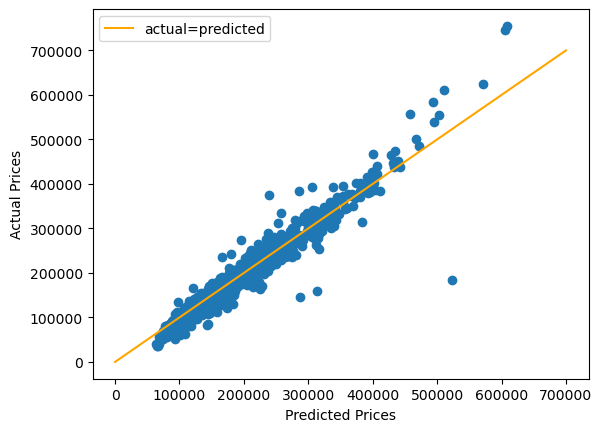

In [854]:
# define random forest
rf = RandomForestRegressor(
    n_estimators=900,
    bootstrap=True,
    max_depth=20,
    min_samples_split=10,
    random_state=42
)

# define XGBoost
xgb = XGBRegressor(
    learning_rate = 0.08,
    n_estimators=200,
    min_child_weight=2,
    subsample=1,
    colsample_bytree=0.8,
    reg_lambda=0.5,
    reg_alpha=0,
    gamma=0.5,
    seed=42
)

# define LightGBM
lgbm = LGBMRegressor(
    learning_rate=0.05,
    n_estimators=64,
    min_child_weight=2,
    num_leaves=24,
    colsample_bytree=0.8,
    reg_lambda=0.4,
    random_state=42
)

# train models
rf.fit(housing_trn_clean, housing_trn_target)
xgb.fit(housing_trn_clean, housing_trn_target)
lgbm.fit(housing_trn_clean, housing_trn_target)

# make predictions
y_hat_rf = rf.predict(housing_trn_clean)
y_hat_vld_rf = rf.predict(housing_vld_clean)
y_hat_xgb = xgb.predict(housing_trn_clean)
y_hat_vld_xgb = xgb.predict(housing_vld_clean)
y_hat_lgbm = lgbm.predict(housing_trn_clean)
y_hat_vld_lgbm = lgbm.predict(housing_vld_clean)

# make hybrid prediction
y_hat_hybrid = (1/3) * y_hat_rf + (1/3) * y_hat_xgb + (1/3) * y_hat_lgbm
y_hat_vld_hybrid = (1/3) * y_hat_vld_rf + (1/3) * y_hat_vld_xgb + (1/3) * y_hat_vld_lgbm

# calculate MSE
mse_rf = mse(y_hat_rf, housing_trn_target)
mse_vld_rf = mse(y_hat_vld_rf, housing_vld_target)
mse_xgb = mse(y_hat_xgb, housing_trn_target)
mse_vld_xgb = mse(y_hat_vld_xgb, housing_vld_target)
mse_lgbm = mse(y_hat_lgbm, housing_trn_target)
mse_vld_lgbm = mse(y_hat_vld_lgbm, housing_vld_target)

mse_hybrid = mse(y_hat_hybrid, housing_trn_target)
mse_vld_hybrid = mse(y_hat_vld_hybrid, housing_vld_target)

# print results
print(f"Random Forest MSE:  {mse_rf}")
print(f"Random Forest Validation MSE:  {mse_vld_rf}")
print(f"XGBoost MSE:  {mse_xgb}")
print(f"XGBoost Validation MSE:  {mse_vld_xgb}")
print(f"LightGBM MSE:  {mse_lgbm}")
print(f"LightGBM Validation MSE:  {mse_vld_lgbm}")
print(f"Hybrid MSE:  {mse_hybrid}")
print(f"Hybrid Validation MSE:  {mse_vld_hybrid}")

print(f"Scaled Training RMSE:  {trn_rmse}")
print(f"Scaled Validation RMSE:  {vld_rmse}")

scaler = StandardScaler()
scaler.fit(housing_trn_target_ns)

original_y_hat_trn = scaler.inverse_transform(y_hat_hybrid.reshape(-1,1))
original_y_hat_vld = scaler.inverse_transform(y_hat_vld_hybrid.reshape(-1,1))
trn_rmse_ns = rmse(original_y_hat_trn, housing_trn_target_ns.reshape(-1,1))
vld_rmse_ns = rmse(original_y_hat_vld, housing_vld_target_ns.reshape(-1,1))

print(f"Training RMSE:  {trn_rmse_ns}")
print(f"Validation RMSE:  {vld_rmse_ns}")

# plot
plt.scatter(list(original_y_hat_trn.reshape(-1)) + list(original_y_hat_vld.reshape(-1)), list(housing_trn_target_ns) + list(housing_vld_target_ns))
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.plot([0,700000], [0,700000], color='orange', label='actual=predicted')
plt.legend()
plt.show()
        


### HKELM

In [888]:
class HKELM(BaseEstimator):
    def __init__(self, C, sigma, theta, a, b):
        self.C = C
        self.sigma = sigma
        self.theta = theta
        self.a = a
        self.b = b

    def hybrid_kernel(self, xi, xj):
        return self.theta * np.exp((-cdist(xi, xj, 'sqeuclidean')) / (2 * self.sigma**2)) + (1 - self.theta) * (xi @ xj.T + self.a)**self.b

    def fit(self, X, y):
        self.X_trn = X
        Omega = self.hybrid_kernel(X,X)
        I = np.eye(X.shape[0])
        self.w = np.linalg.pinv(Omega + I/self.C) @ y
    
    def predict(self, X):
        K = self.hybrid_kernel(X, self.X_trn)
        return K @ self.w


Scaled Training RMSE:  0.29241714947232433
Scaled Validation RMSE:  0.37901445700607955
Training RMSE:  14356.672799882783
Validation RMSE:  28784.646863998572


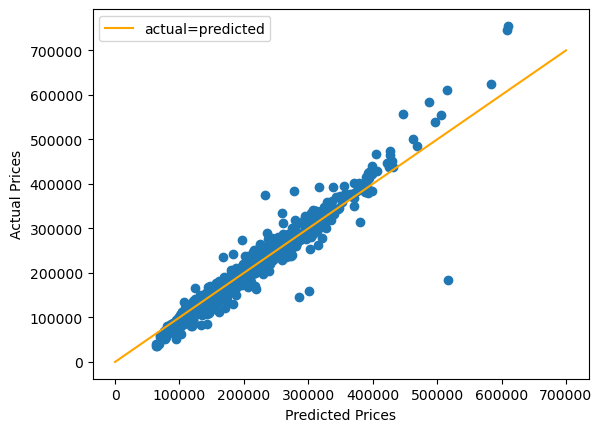

In [893]:
hkelm = HKELM(
    C = 0.2,
    sigma = 0.2,
    theta = 0.8,
    a = 0.5,
    b = 1
)

hkelm.fit(housing_trn_clean, housing_trn_target)

y_hat_trn = hkelm.predict(housing_trn_clean)
y_hat_vld = hkelm.predict(housing_vld_clean)

trn_rmse = rmse(y_hat_trn, housing_trn_target)
vld_rmse = rmse(y_hat_vld, housing_vld_target)

print(f"Scaled Training RMSE:  {trn_rmse}")
print(f"Scaled Validation RMSE:  {vld_rmse}")

scaler = StandardScaler()
scaler.fit(housing_trn_target_ns)

original_y_hat_trn = scaler.inverse_transform(y_hat_hybrid.reshape(-1,1))
original_y_hat_vld = scaler.inverse_transform(y_hat_vld_hybrid.reshape(-1,1))
trn_rmse_ns = rmse(original_y_hat_trn, housing_trn_target_ns.reshape(-1,1))
vld_rmse_ns = rmse(original_y_hat_vld, housing_vld_target_ns.reshape(-1,1))

print(f"Training RMSE:  {trn_rmse_ns}")
print(f"Validation RMSE:  {vld_rmse_ns}")


# plot
plt.scatter(list(original_y_hat_trn.reshape(-1)) + list(original_y_hat_vld.reshape(-1)), list(housing_trn_target_ns) + list(housing_vld_target_ns))
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.plot([0,700000], [0,700000], color='orange', label='actual=predicted')
plt.legend()
plt.show()